# Lending Club Case Study

###### The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

## 1. Data Understanding

#### To be done at the last

## 2. Data Cleaning and Manipulation

1. Loading data from loan CSV
2. Checking for null values in the dataset
3. Checking for unique values
4. Checking for duplicated rows in data
5. Dropping columns
6. Common Functions
7. Data Conversion
8. Imputing values in Columns

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 2.1. Loading data from loan CSV

In [2]:
loan_df = pd.read_csv('loan.csv')
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.2. Checking for null values in the dataset

In [3]:
loan_df.isna().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

###### There are a lot of empty columns in the loan dataset. Dropping those columns from the dataset and then checking the dataset shape

In [4]:
loan_df.dropna(axis = 1, how = 'all', inplace = True)
loan_df.shape

(39717, 57)

### 2.3. Checking for unique values

##### If the column has only a single unique value, it does not make any sense to include it as part of our data analysis. We need to find out those columns and drop them from the dataset

In [5]:
remove_columns_list = []
for i in loan_df.columns:
    # Check if unique value count is 1
    if loan_df[i].nunique() == 1:
        remove_columns_list.append(i)
    

# Remove those columns
loan_df.drop(remove_columns_list, axis = 1, inplace = True)

In [6]:
loan_df.shape

(39717, 48)

### 2.4. Checking for duplicated rows in data

In [7]:
loan_df[loan_df.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies


###### There is no duplicate row found

### 2.5 Dropping columns

#### Dropping columns where loan_status = 'Current'

###### The loan in progress cannot provide us insights as to whether the borrower is likely to default or not. Hence, dropping those columns

In [8]:
loan_df = loan_df[loan_df['loan_status'].str.lower() != "current"]
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,NaN,Jan-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,NaN,Jun-07,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,NaN,Jun-07,NaN


#### Dropping columns where missing data is more than equal to 65%

###### These columns will skew our data analysis and they need to be removed

In [9]:
for col in loan_df.columns:
    missing_values = round(loan_df[col].isna().sum() / loan_df.shape[0], 2)
    if missing_values >= 0.65:
        loan_df.drop(col, axis = 1, inplace = True)
        
loan_df.shape

(38577, 45)

#### Dropping columns containing text like desc, emp_title, id, member_id, title, url, zip_code

###### These will not contribute to loan pass or fail

In [10]:
# List the coumns which are not required for the analysis. Total 27 columns
drop_cols = ['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d', 'desc', 'emp_title', 'id', 'member_id', 'title', 'url', 'zip_code']

loan_df.drop(drop_cols, axis = 1, inplace = True)

In [11]:
loan_df.shape

(38577, 18)

### 2.6. Common Functions

In [74]:
def plot_bar_graph(dataframe, x_column, y_column=None, hue_column=None, title=None, xlabel=None, ylabel=None, figsize=(10, 6), x_tick_rotation=90, freq_rotation=0):
    """
    Create a Seaborn bar plot for a specified column in a DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        x_column (str): The name of the column to be plotted on the x-axis.
        y_column (str, optional): The name of the column to be plotted on the y-axis. Default is None.
        hue_column (str, optional): The name of the column to use for color differentiation. Default is None.
        title (str, optional): The title of the plot. Default is None.
        xlabel (str, optional): Label for the x-axis. Default is None.
        ylabel (str, optional): Label for the y-axis. Default is None.
        figsize (tuple, optional): Figure size in inches (width, height). Default is (10, 6).
        x_tick_rotation (int, optional): Rotation value for x-axis ticks. Default is 90.
        freq_rotation (int, optional): Rotation value for the exact frequency labels on each bar. Default is 0.

    Returns:
        None
    """
    # Set the style
    sns.set(style="whitegrid")

    # Create the bar plot
    plt.figure(figsize=figsize)
    
    if y_column:
        y_data = dataframe[y_column].value_counts()
        x_data = y_data.index
        sns.barplot(x=x_data, y=y_data.values, hue=hue_column)
    else:
        sns.barplot(data=dataframe, x=x_column, hue=hue_column)

    # Display frequency on top of the bars with rotation
    if y_column:
        for p in plt.gca().patches:
            plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', rotation=freq_rotation)

    # Set title and labels
    if title:
        plt.title(title, fontsize=14)
    if xlabel:
        plt.xlabel(xlabel, fontsize=12)
    if ylabel:
        plt.ylabel(ylabel, fontsize=12)

    # Rotate x-axis labels
    plt.xticks(rotation=x_tick_rotation)

    # Show the plot
    plt.show()

In [13]:
def plot_cross_tab_graph_for_defaulters(df: pd.DataFrame, defaulter_dict: dict) -> None:
    """
    Function to plot cross tabulation graph for loan defaulters (charged-off) against driver variables for default
    For instance, purpose for taking a loan.

    Args:
        df: Input Dataframe having loan status details
        defaulter_dict: Dictionary having keys representing configuration of Default Drivers along with plot configurations

    Returns:
        Seaborn Count plot with frequency annotations of default driver variables
    """

    fig = plt.figure(1, figsize=(defaulter_dict['figsize_x'], defaulter_dict['figsize_y']))
    ax = sns.countplot(data=df[df.loan_status == 'Charged Off'], y = defaulter_dict['default_driver'])

    for p in ax.patches:
            ax.annotate(
                int(p.get_width()),
                ((p.get_x() + p.get_width()), p.get_y()),
                xytext=defaulter_dict['xytext'],
                fontsize=14,
                color='#d00436',
                textcoords='offset points',
                horizontalalignment='right'
            )

    plt.xlabel(
        defaulter_dict['xlabel'],
        fontsize=14,
        fontweight='bold'
    )

    plt.ylabel(
        defaulter_dict['ylabel'],
        fontsize=14,
        fontweight='bold'
    )

    plt.title(
        defaulter_dict['title'],
        color='red',
        fontsize=24,
        fontweight='bold',
        y=1.05
    )

    plt.show()

In [14]:
def calculate_boxplot_stats(df: pd.DataFrame, column: str, iqr_multiplier: float = 1.5) -> dict:
    """
    Calculate the Interquartile Range (IQR) and the lower and upper bounds for outlier detection.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The name of the column for which to calculate the IQR and bounds.
        iqr_multiplier (float, optional): Multiplier for the IQR to determine bounds. Default is 1.5.

    Returns:
        dict: A dictionary containing the following values:
            - 'quartile1': The first quartile (25th percentile).
            - 'quartile3': The third quartile (75th percentile).
            - 'iqr': The Interquartile Range (IQR).
            - 'lower_bound': The lower bound for outlier detection.
            - 'upper_bound': The upper bound for outlier detection.
    """
    quartile1 = df[column].quantile(0.25)
    quartile3 = df[column].quantile(0.75)
    iqr = quartile3 - quartile1
    lower_bound = quartile1 - iqr_multiplier * iqr
    upper_bound = quartile3 + iqr_multiplier * iqr
    return {
        'quartile1': quartile1,
        'quartile3': quartile3,
        'iqr': iqr,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }


In [15]:
def create_boxplot(df: pd.DataFrame, column_name: str, title: str = None, horizontal: bool = True) -> None:
    """
    Create a box plot for a specified column in a DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to be plotted.
        title (str, optional): The title of the plot. Default is None.
        orient (str): The orientation of the plot. Default is horizontal. Possible values - h, v.

    Returns:
        None
    """

    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
        return

    plt.figure(figsize=(8, 6))
    if horizontal:
        sns.boxplot(y=df[column_name], orient='h', palette='Set2')
    else:
        sns.boxplot(x=df[column_name], orient='v', palette='Set2')

    if title:
        plt.title(title)

    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.show()


In [16]:
def bucket_data(column, thresholds, labels):
    """
    Bucket data based on specified thresholds and labels.

    Parameters:
        column (float): The numeric value to be bucketed.
        thresholds (list of float): The list of threshold values for bucketing.
        labels (list of str): The list of labels corresponding to the buckets.

    Returns:
        str: The bucket label for the given column value.
    """
    for i, threshold in enumerate(thresholds):
        if column < threshold:
            return labels[i]
    return labels[-1]


#### Sorting the dataframe columns in ascending order to address all columns alphabetically

In [17]:
loan_df = loan_df.reindex(sorted(loan_df.columns), axis=1)
loan_df

,addr_state,annual_inc,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,installment,int_rate,issue_d,loan_amnt,loan_status,pub_rec_bankruptcies,purpose,sub_grade,term,verification_status
0,AZ,24000.0,27.65,10+ years,5000,4975.0,B,RENT,162.87,10.65%,Dec-11,5000,Fully Paid,0.0,credit_card,B2,36 months,Verified
1,GA,30000.0,1.00,< 1 year,2500,2500.0,C,RENT,59.83,15.27%,Dec-11,2500,Charged Off,0.0,car,C4,60 months,Source Verified
2,IL,12252.0,8.72,10+ years,2400,2400.0,C,RENT,84.33,15.96%,Dec-11,2400,Fully Paid,0.0,small_business,C5,36 months,Not Verified
3,CA,49200.0,20.00,10+ years,10000,10000.0,C,RENT,339.31,13.49%,Dec-11,10000,Fully Paid,0.0,other,C1,36 months,Source Verified
5,AZ,36000.0,11.20,3 years,5000,5000.0,A,RENT,156.46,7.90%,Dec-11,5000,Fully Paid,0.0,wedding,A4,36 months,Source Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,CO,110000.0,11.33,4 years,2500,1075.0,A,MORTGAGE,78.42,8.07%,Jul-07,2500,Fully Paid,NaN,home_improvement,A4,36 months,Not Verified
39713,NC,18000.0,6.40,3 years,8500,875.0,C,RENT,275.38,10.28%,Jul-07,8500,Fully Paid,NaN,credit_card,C1,36 months,Not Verified
39714,MA,100000.0,2.30,< 1 year,5000,1325.0,A,MORTGAGE,156.84,8.07%,Jul-07,5000,Fully Paid,NaN,debt_consolidation,A4,36 months,Not Verified
39715,MD,200000.0,3.72,< 1 year,5000,650.0,A,MORTGAGE,155.38,7.43%,Jul-07,5000,Fully Paid,NaN,other,A2,36 months,Not Verified


### 2.7. Data Conversion

In [18]:
# Convert term column to int type
loan_df['term'] = loan_df['term'].apply(lambda x: int(x.replace('months', '').strip()))

In [19]:
# Convert int_rate column to float type
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: float(x.replace('%', '').strip()))

In [20]:
# Rounding of the values of below columns to two decimal places
for col in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    loan_df[col] = loan_df[col].apply(lambda x: round(x, 2))

In [21]:
# Converting the column issue_d from string to DateTime
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format = '%b-%y')

### 2.8. Imputing values in Columns

In [22]:
loan_df.emp_length.isna().sum()

1033

In [23]:
# Annual income of loan applicants whose employment length is missing
loan_df[loan_df.emp_length.isna()]['annual_inc'].describe()

count      1033.000000
mean      45913.330649
std       37964.731520
min        4200.000000
25%       25000.000000
50%       38368.000000
75%       57600.000000
max      648000.000000
Name: annual_inc, dtype: float64

In [24]:
# Find the most frequent value of employment length
loan_df.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

###### Employment length has 1033 missing values, which means either they are not employed or self-employed (business owners). Considering they have a decent annual income, we have assumed that these are business owners and we have added their employment duration with the mode value of emp_length which is 10+ years

In [25]:
loan_df.emp_length.fillna(loan_df.emp_length.mode()[0], inplace = True)

In [26]:
# Verify if the imputation of values is successful
loan_df.emp_length.isna().sum()

0

In [27]:
emp_length_mapping: dict = {
    '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
    '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
    '8 years': 8, '9 years': 9, '10+ years': 10
}

# Use the map function to replace values in the 'emp_length' column
loan_df['emp_length'] = loan_df['emp_length'].map(emp_length_mapping)

In [28]:
loan_df.home_ownership.value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [29]:
# Imputing NONE values as OTHER
loan_df['home_ownership'].replace('NONE', 'OTHER', inplace = True)

In [30]:
loan_df.home_ownership.value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER         101
Name: home_ownership, dtype: int64

In [31]:
loan_df.verification_status.value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

#### Replacing the 'Source Verified' values as 'Verified' since both values mean the same thing i.e. the loan applicant has some source of income which is verified

In [32]:
loan_df['verification_status'].replace('Source Verified', 'Verified', inplace = True)

In [33]:
loan_df.verification_status.value_counts()

Verified        21883
Not Verified    16694
Name: verification_status, dtype: int64

## 3. Data Analysis
1. Derived Columns
2. Univariate Analysis
3. Segmented Univariate Analysis
4. Bivariate Analysis
5. Multivariate Analysis

### 3.1. Derived Columns
1. Derived metrics for Month (issue_m), Year (issue_y) and Quarter (issue_q) from column "issue_d"
2. Create new column loan_paid with 'Yes' and 'No' values based on loan_status column where 'Yes' = "Fully Paid" and 'No' = "Charged off"
3. Creating different buckets for loan amount (loan_amount_bucket), interest rate (interest_rate_bucket), annual income (annual_income_bucket)

#### 3.1.1. Derived metrics for Month (issue_m), Year (issue_y) and Quarter (issue_q) from column "issue_d"

In [34]:
# Extracting Month and Year for analysis from issue_d
loan_df['issue_m'] = pd.DatetimeIndex(loan_df['issue_d']).month
loan_df['issue_y'] = pd.DatetimeIndex(loan_df['issue_d']).year

In [35]:
# Categorising Months into quaterly buckets
threshold_months = [4, 7, 9]
quarter_labels = ['Q1', 'Q2', 'Q3', 'Q4']
loan_df['issue_q'] = loan_df['issue_m'].apply(bucket_data, args=(threshold_months, quarter_labels))

In [36]:
loan_df[['issue_d', 'issue_m', 'issue_q']]

,issue_d,issue_m,issue_q
0,2011-12-01,12,Q4
1,2011-12-01,12,Q4
2,2011-12-01,12,Q4
3,2011-12-01,12,Q4
5,2011-12-01,12,Q4
...,...,...,...
39712,2007-07-01,7,Q3
39713,2007-07-01,7,Q3
39714,2007-07-01,7,Q3
39715,2007-07-01,7,Q3


#### 3.1.2. Create new column loan_paid with 'Yes' and 'No' values based on loan_status column where 'Yes' = "Fully Paid" and 'No' = "Charged off"

In [37]:
loan_status_map = {'Charged Off': 'No', 'Fully Paid': 'Yes' }
loan_df['loan_paid'] = loan_df['loan_status'].map(loan_status_map)

#### 3.1.3. Creating different buckets for loan amount (loan_amount_bucket), interest rate (interest_rate_bucket), annual income (annual_income_bucket)

In [38]:
# Categorising Loan Amount
loan_amount_thresholds = [5000, 10000, 15000]
loan_amount_labels = ['0 - 5K', '5K - 10K', '10K - 15K', '15K - above']
loan_df['loan_amnt_bucket'] = loan_df['loan_amnt'].apply(bucket_data, args=(loan_amount_thresholds, loan_amount_labels))

In [39]:
loan_df[['loan_amnt', 'loan_amnt_bucket']]

,loan_amnt,loan_amnt_bucket
0,5000,5K - 10K
1,2500,0 - 5K
2,2400,0 - 5K
3,10000,10K - 15K
5,5000,5K - 10K
...,...,...
39712,2500,0 - 5K
39713,8500,5K - 10K
39714,5000,5K - 10K
39715,5000,5K - 10K


In [40]:
# Bucketting for int_rate
int_rate_bins = [5, 9, 13, 17, 21]
int_rate_labels = ['0%-5%', '5%-9%','9%-13%','13%-17%','17%-21%','21%-25%']
loan_df['int_rate_bucket'] = loan_df['int_rate'].apply(bucket_data, args=((int_rate_bins, int_rate_labels)))

In [41]:
loan_df[['int_rate', 'int_rate_bucket']]

,int_rate,int_rate_bucket
0,10.65,9%-13%
1,15.27,13%-17%
2,15.96,13%-17%
3,13.49,13%-17%
5,7.90,5%-9%
...,...,...
39712,8.07,5%-9%
39713,10.28,9%-13%
39714,8.07,5%-9%
39715,7.43,5%-9%


In [42]:
# Bucketting Annual Income
annual_inc_thresholds = [40000, 50000, 60000, 70000, 80000]
annual_inc_labels = ['0 - 40k', '40k - 50k', '50k - 60k', '60k - 70k', '70k - 80k', '80k - above']
loan_df['annual_inc_bucket'] = loan_df['annual_inc'].apply(bucket_data, args=(annual_inc_thresholds, annual_inc_labels))

In [43]:
loan_df[['annual_inc', 'annual_inc_bucket']]

,annual_inc,annual_inc_bucket
0,24000.0,0 - 40k
1,30000.0,0 - 40k
2,12252.0,0 - 40k
3,49200.0,40k - 50k
5,36000.0,0 - 40k
...,...,...
39712,110000.0,80k - above
39713,18000.0,0 - 40k
39714,100000.0,80k - above
39715,200000.0,80k - above


### 3.2 Univariate Analysis

Following fields will be checked as part of univariate analysis

#### 1. Categorical variables
    1. Ordered categorical data
        1. Grade (grade)
        2. Sub grade (sub_grade)
        3. Term (36 / 60 months) (term)
        4. Employment length (emp_length)
        5. Issue year (issue_y)
        6. Issue month (issue_m)
        7. Issue quarter (issue_q)

    2. Unordered categorical data
        1. Address State
        2. Loan purpose
        3. Home Ownership
        4. Loan status
        5. Loan paid
    
#### 2. Quantitative variables
    1. Interest rate bucket
    2. Annual income bucket
    3. Loan amount
    4. Funded amount
    5. Debt to Income Ratio (DTI)
    

#### 3.2.1. Ordered Categorical Variables

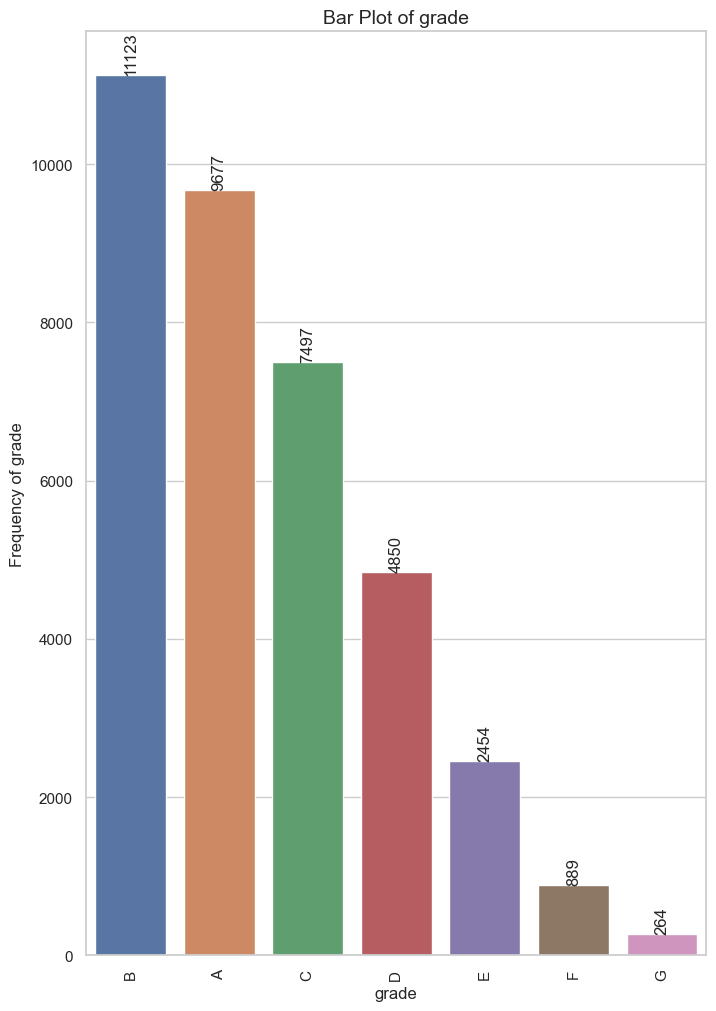

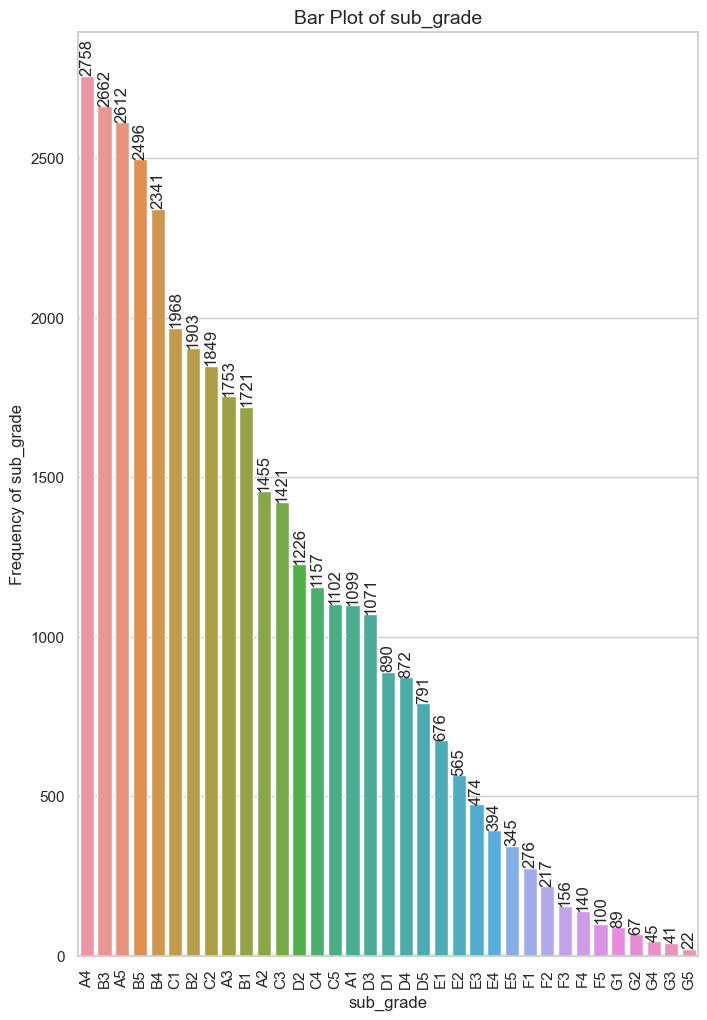

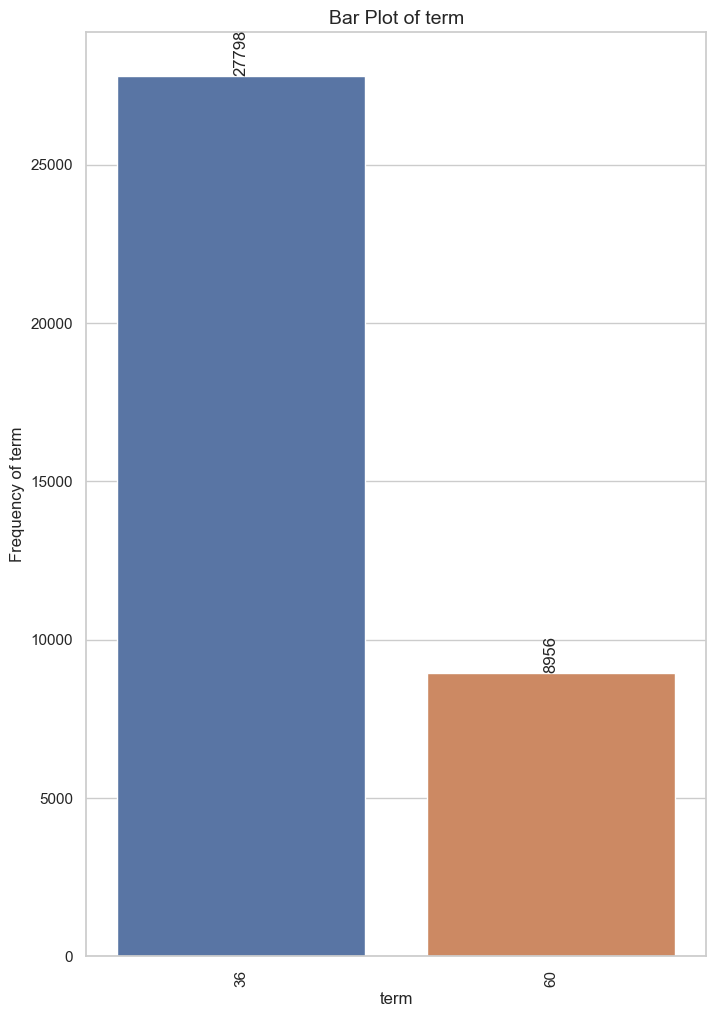

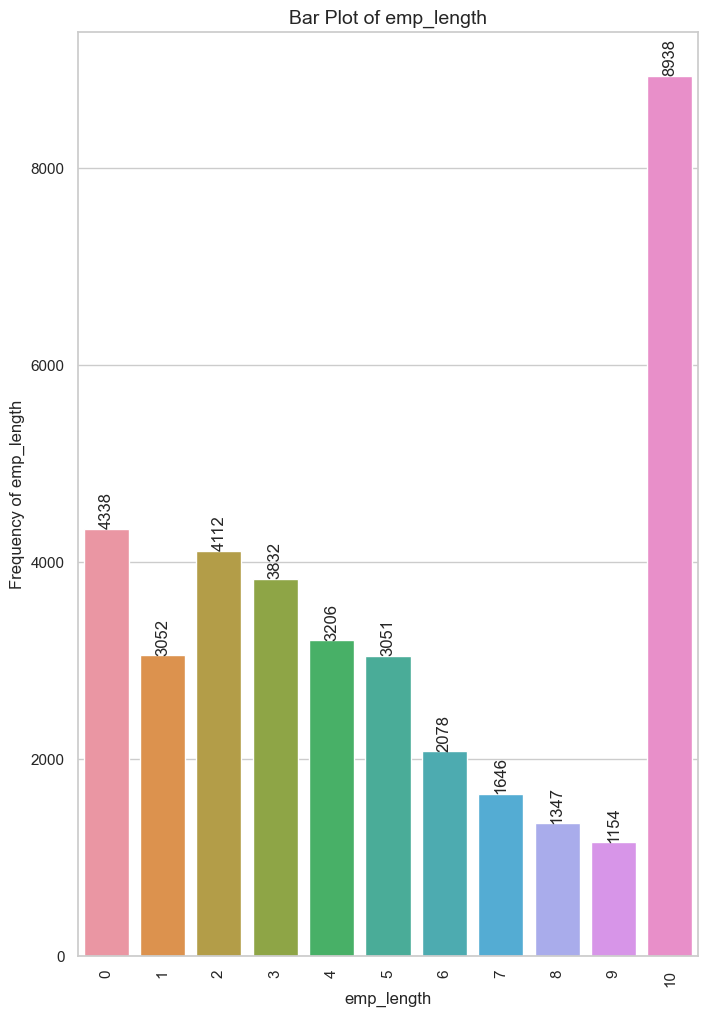

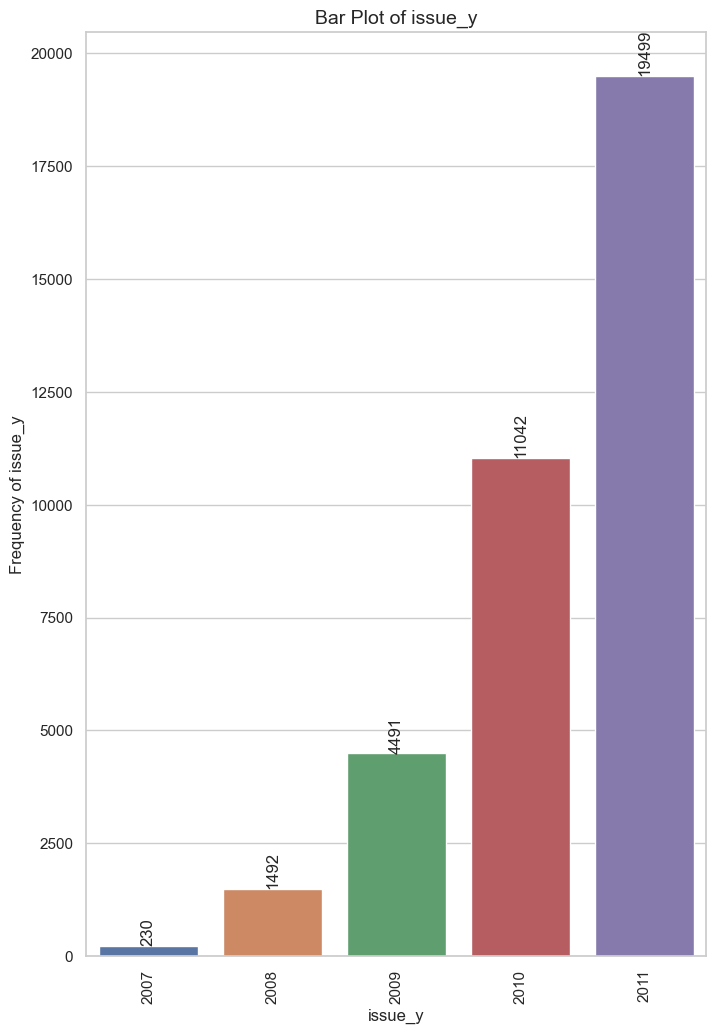

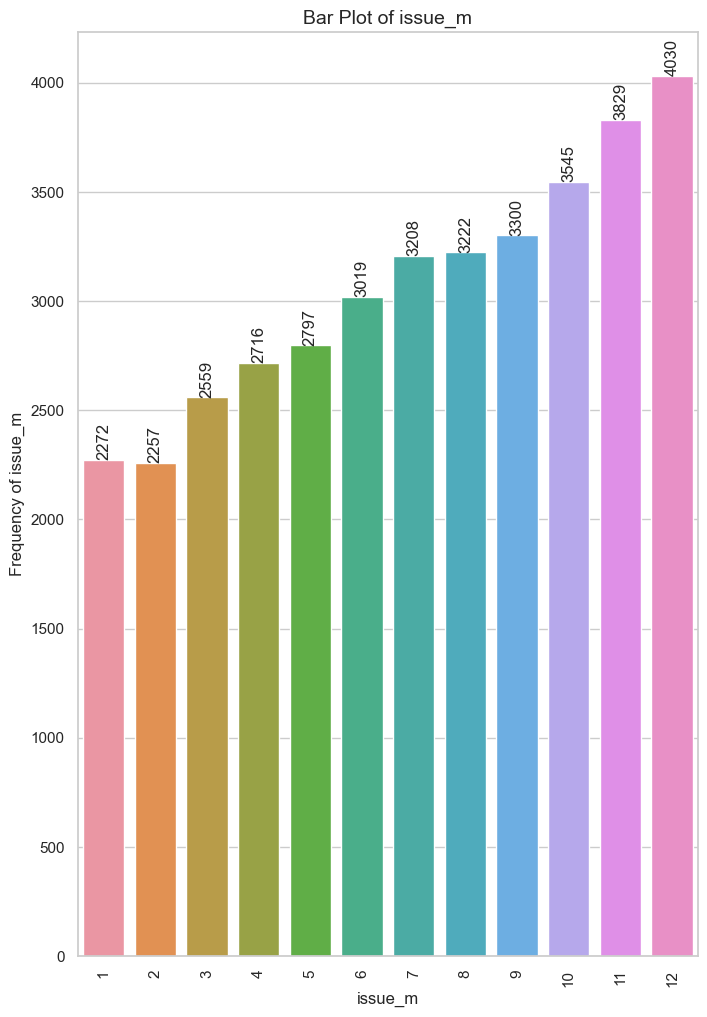

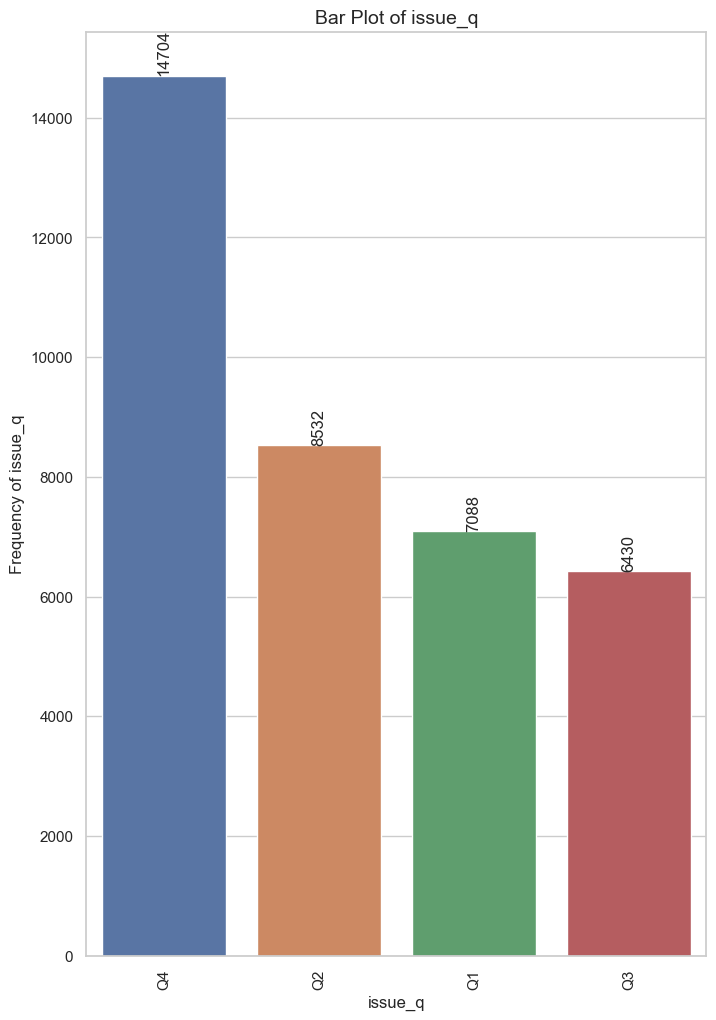

In [81]:
for cat_var in ['grade', 'sub_grade', 'term', 'emp_length', 'issue_y', 'issue_m', 'issue_q']:
    plot_bar_graph(
        loan_df,
        x_column = cat_var,
        y_column = cat_var,
        title = f'Bar Plot of {cat_var}',
        xlabel = cat_var,
        ylabel=f'Frequency of {cat_var}',
        figsize=(8, 12),
        x_tick_rotation=90,
        freq_rotation=90
    )



### Inferences from Univariate Analysis

1. The majority of loan applicants belonged to grade B, with a total count of 11,123.
2. Short-term loans for 36 months were the most popular, with 27,798 applications.
3. Applicants with employment tenure greater than 10 years applied for the highest number of loans, totaling 8,938.
4. The year 2011 saw the highest number of loan applications, indicating a positive trend in the number of applicants over the years.
5. Loans were predominantly taken in the 4th quarter (14,704), mainly in December, possibly due to the holiday season.

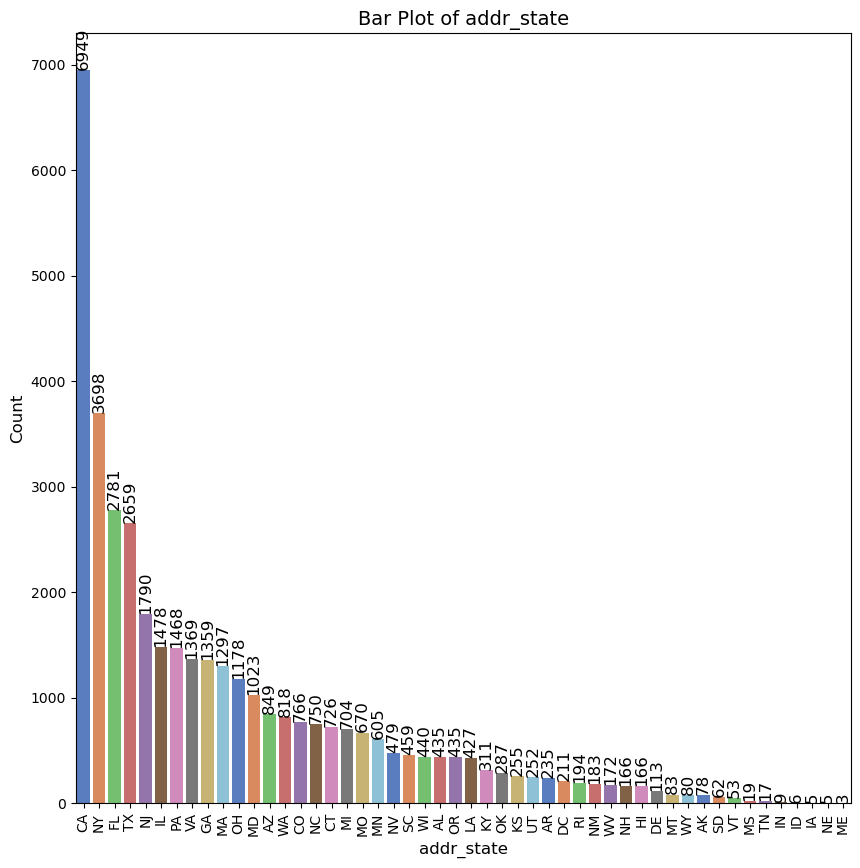

In [44]:
plot_bar_graph(loan_df, 'addr_state')

###### The highest number of loan applicants belonged to the state of California.

In [45]:
loan_df.annual_inc.value_counts().sort_index(ascending=False)

6000000.0    1
3900000.0    1
2039784.0    1
1900000.0    1
1782000.0    1
            ..
4888.0       1
4800.0       4
4200.0       2
4080.0       1
4000.0       1
Name: annual_inc, Length: 5215, dtype: int64

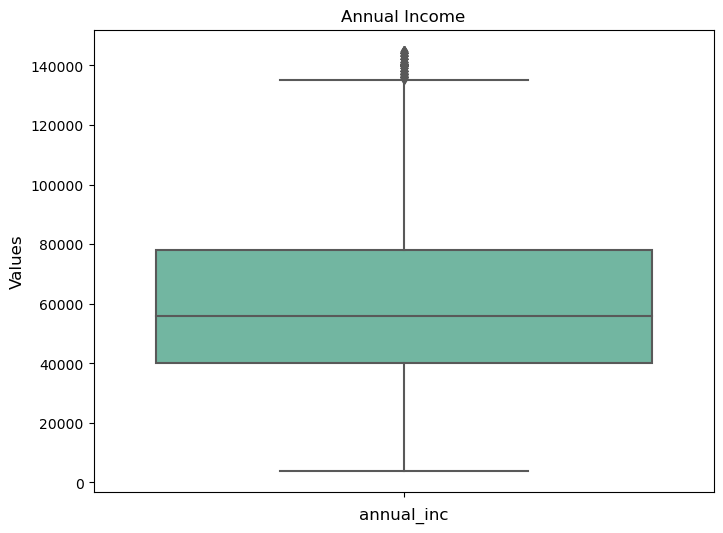

In [46]:
# Calulcate the lower bound and upper bound
is_annual_inc_lb = calculate_boxplot_stats(loan_df, 'annual_inc')['lower_bound']
is_annual_inc_ub = calculate_boxplot_stats(loan_df, 'annual_inc')['upper_bound']
is_annual_inc_lt = loan_df.annual_inc > is_annual_inc_lb
is_annual_inc_gt = loan_df.annual_inc < is_annual_inc_ub

req_income = is_annual_inc_lt & is_annual_inc_gt

# Filter the rows with required annual income range between lower and upper bound
loan_df = loan_df[req_income]

# Show boxplot
create_boxplot(loan_df, 'annual_inc', title='Annual Income')

###### The annual income of loan applicants were mostly between USD 40k - 75k

In [47]:
loan_df

,addr_state,annual_inc,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,installment,int_rate,...,sub_grade,term,verification_status,issue_m,issue_y,issue_q,loan_paid,loan_amnt_bucket,int_rate_bucket,annual_inc_bucket
0,AZ,24000.0,27.65,10,5000,4975.0,B,RENT,162.87,10.65,...,B2,36,Verified,12,2011,Q4,Yes,5K - 10K,9%-13%,0 - 40k
1,GA,30000.0,1.00,0,2500,2500.0,C,RENT,59.83,15.27,...,C4,60,Verified,12,2011,Q4,No,0 - 5K,13%-17%,0 - 40k
2,IL,12252.0,8.72,10,2400,2400.0,C,RENT,84.33,15.96,...,C5,36,Not Verified,12,2011,Q4,Yes,0 - 5K,13%-17%,0 - 40k
3,CA,49200.0,20.00,10,10000,10000.0,C,RENT,339.31,13.49,...,C1,36,Verified,12,2011,Q4,Yes,10K - 15K,13%-17%,40k - 50k
5,AZ,36000.0,11.20,3,5000,5000.0,A,RENT,156.46,7.90,...,A4,36,Verified,12,2011,Q4,Yes,5K - 10K,5%-9%,0 - 40k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39711,CO,75000.0,15.55,5,5000,700.0,B,MORTGAGE,158.30,8.70,...,B1,36,Not Verified,7,2007,Q3,Yes,5K - 10K,5%-9%,70k - 80k
39712,CO,110000.0,11.33,4,2500,1075.0,A,MORTGAGE,78.42,8.07,...,A4,36,Not Verified,7,2007,Q3,Yes,0 - 5K,5%-9%,80k - above
39713,NC,18000.0,6.40,3,8500,875.0,C,RENT,275.38,10.28,...,C1,36,Not Verified,7,2007,Q3,Yes,5K - 10K,9%-13%,0 - 40k
39714,MA,100000.0,2.30,0,5000,1325.0,A,MORTGAGE,156.84,8.07,...,A4,36,Not Verified,7,2007,Q3,Yes,5K - 10K,5%-9%,80k - above


###### Convert funded amount (funded_amnt) and loan amount (loan_amnt) to float to match the data

In [48]:
loan_df = loan_df.astype({ 'funded_amnt' : 'float', 'loan_amnt' : 'float' })

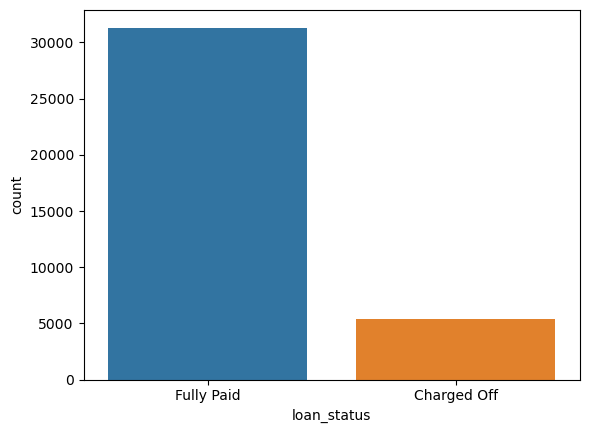

In [49]:
ax = sns.countplot(data = loan_df, x = 'loan_status')
plt.show()

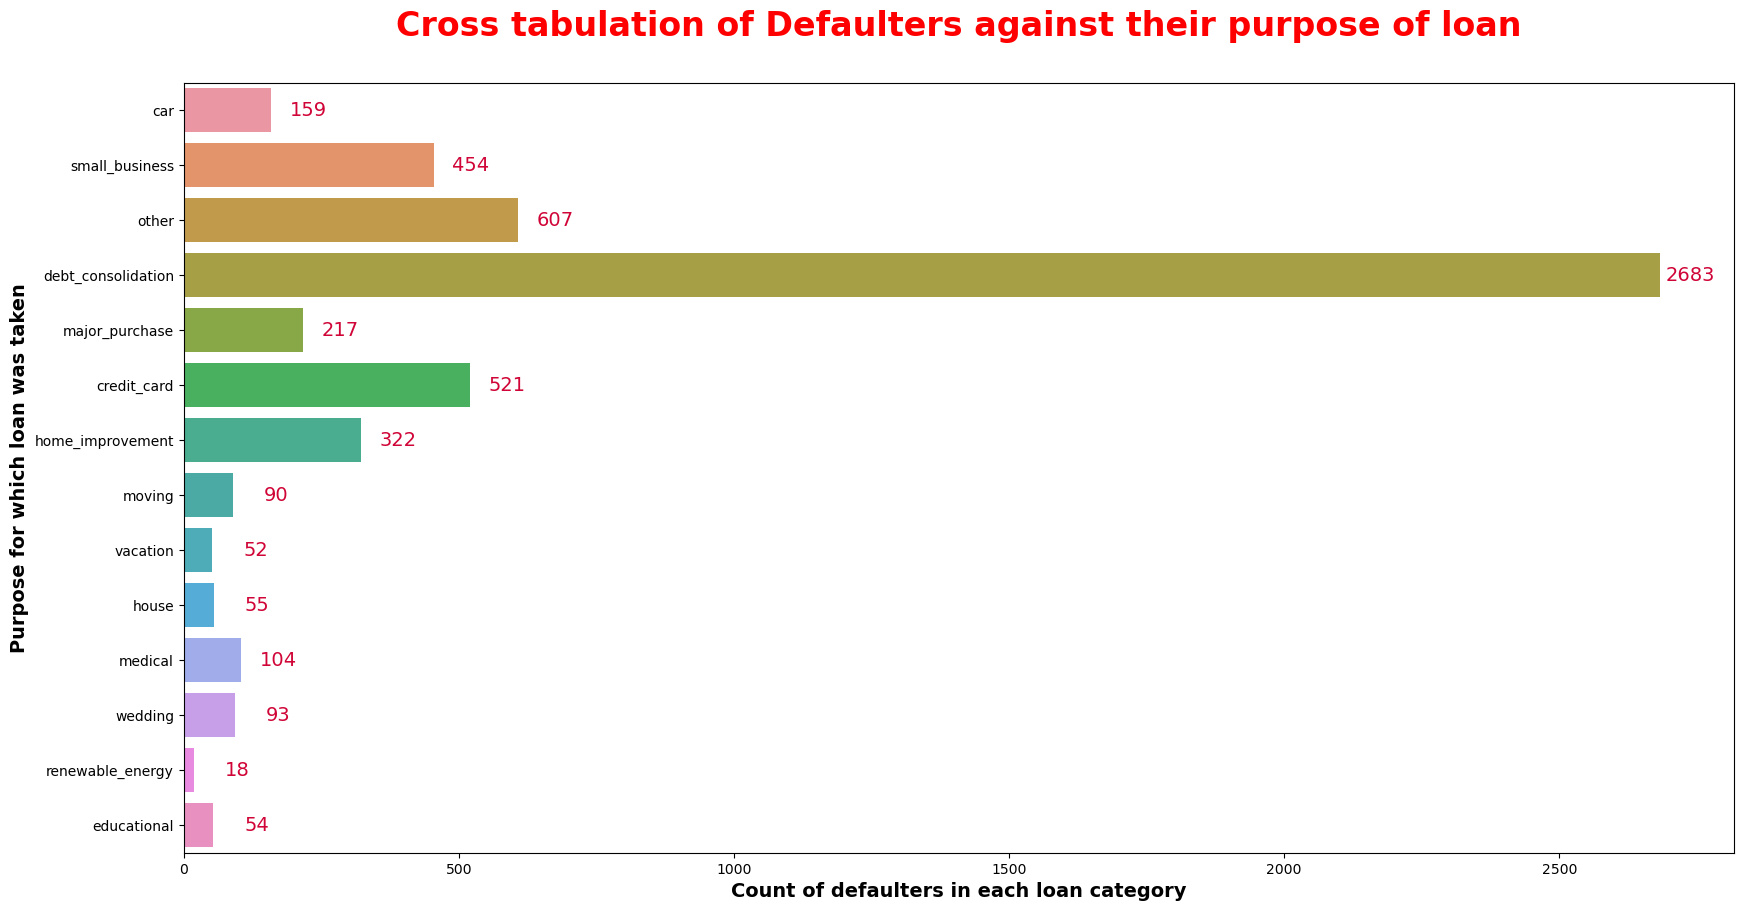

In [50]:
purpose_dict = dict(
    default_driver='purpose',
    figsize_x=20,
    figsize_y=10,
    xlabel='Count of defaulters in each loan category',
    ylabel='Purpose for which loan was taken',
    xytext=(40, -20),
    title='Cross tabulation of Defaulters against their purpose of loan'
)

plot_cross_tab_graph_for_defaulters(loan_df, purpose_dict)


## Address State of Loan Defaulters

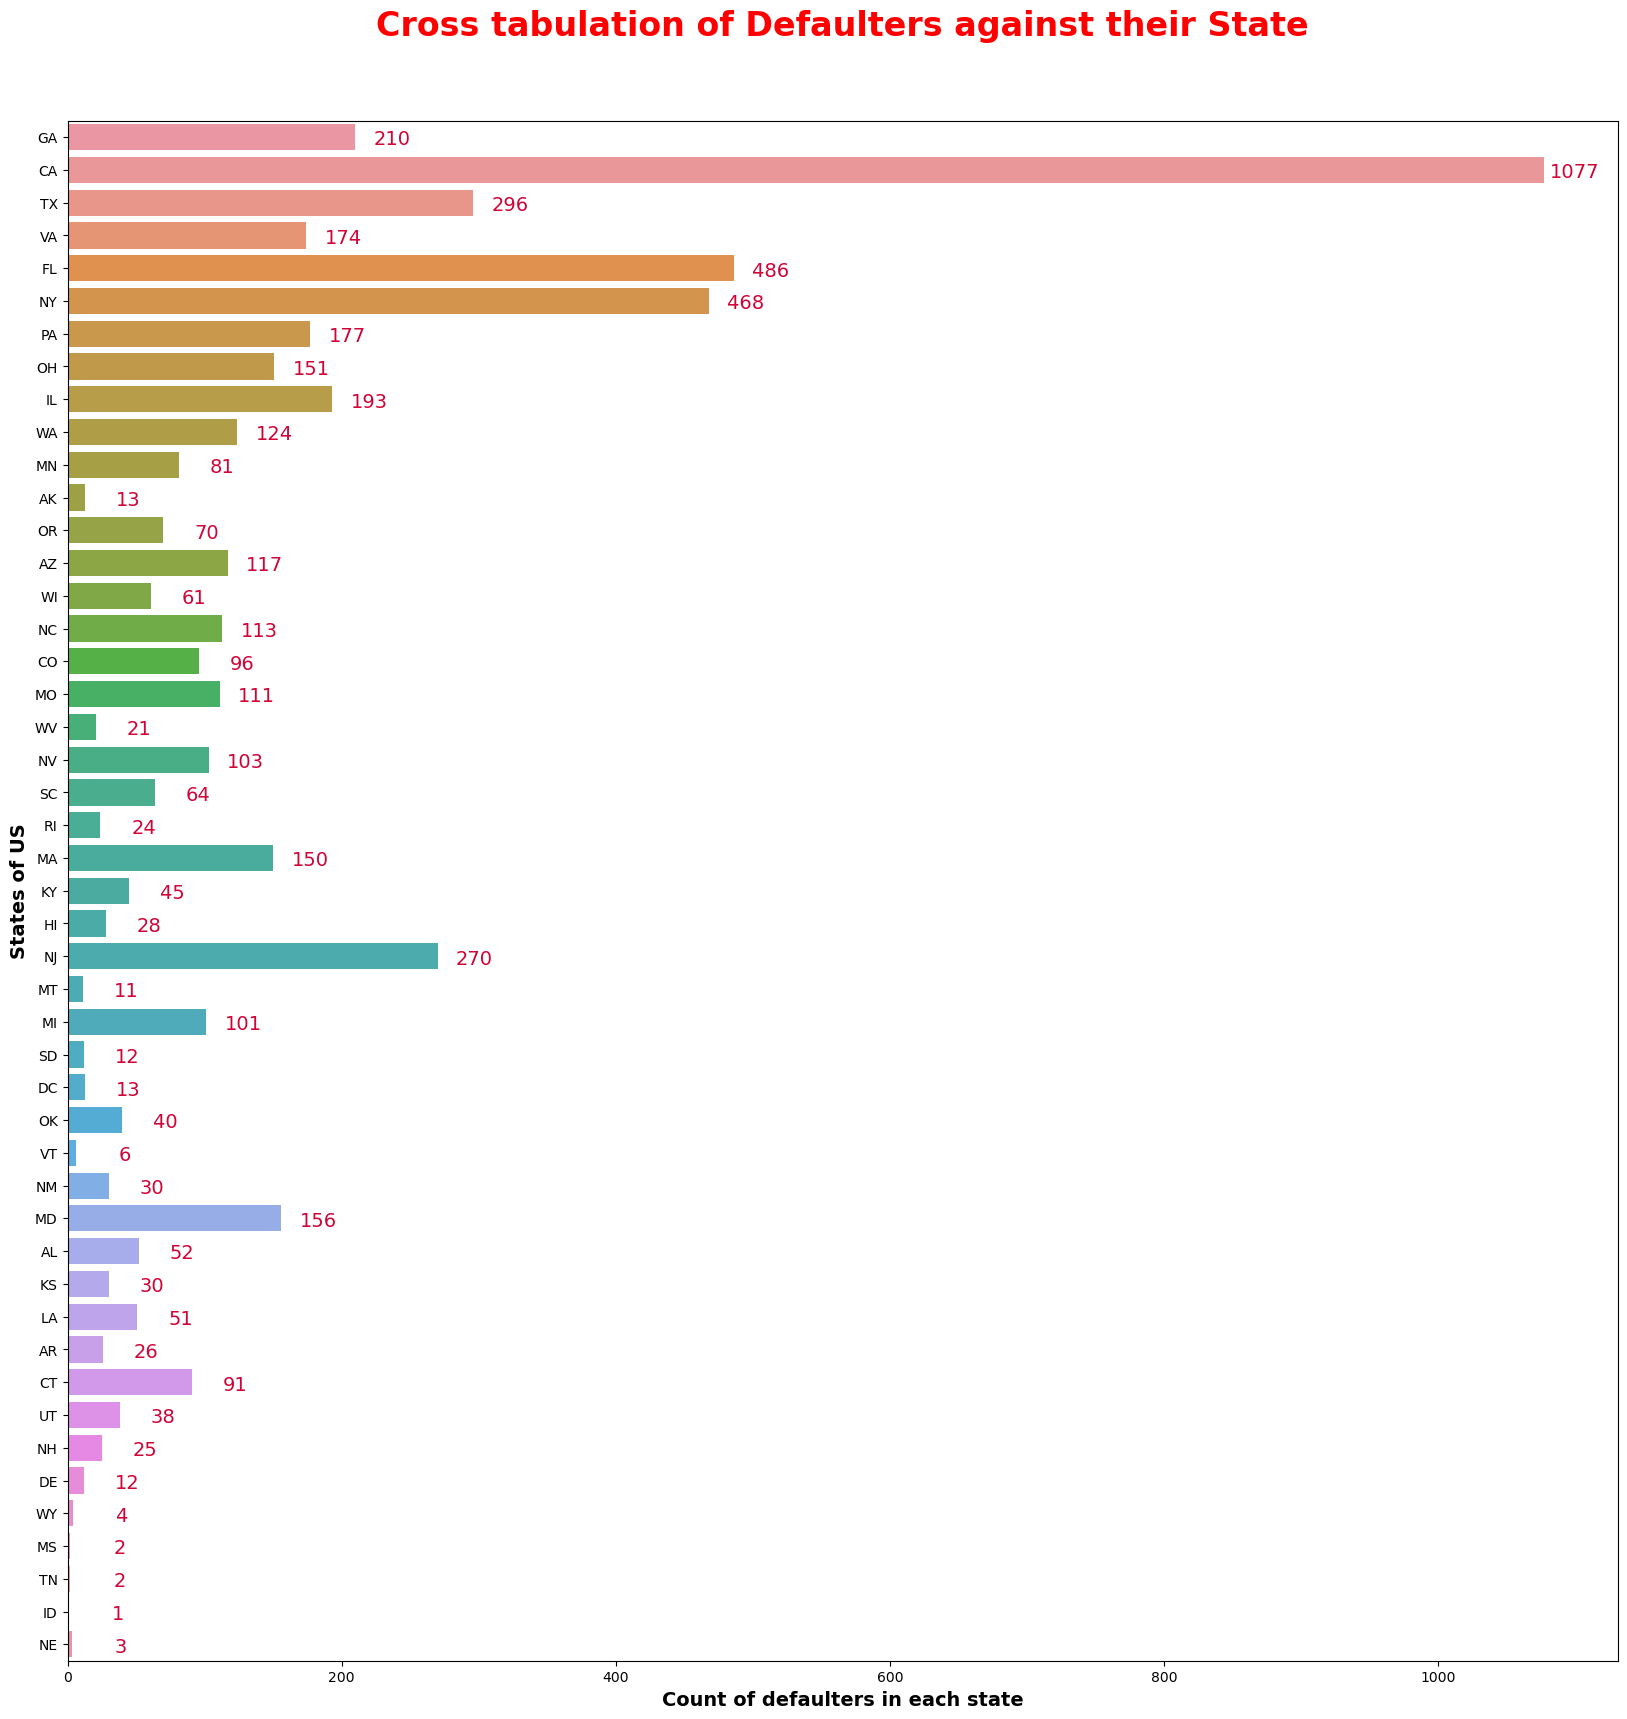

In [51]:
address_state_dict = dict(
    default_driver='addr_state',
    figsize_x=20,
    figsize_y=20,
    xlabel='Count of defaulters in each state',
    ylabel='States of US',
    xytext=(40, -15),
    title='Cross tabulation of Defaulters against their State'
)

plot_cross_tab_graph_for_defaulters(loan_df, address_state_dict)
